In [36]:
#import for homework
import numpy as np
import os
import random
from common import *

Image Filtering [50 pts]\
In this first section, you will explore different ways to filter images. Through these tasks you will build
up a toolkit of image filtering techniques. By the end of this problem, you should understand how the
development of image filtering techniques has led to convolution.

Image Patches [8 pts] A patch is a small piece of an image. Sometimes we will focus on the patches of
an image instead of operating on the entire image itself.

(5 pts) Take the image ’grace hopper.png’, load it as grayscale, and divide the image into 16
by 16 pixel image patches. Normalize each patch to have zero mean and unit variance. Complete the
function image patches in filters.py. Plot three of the 16x16 image patches in your report.

In [34]:
## Image Patches ##
def image_patches(image, patch_size=(16,16)):
    # Given an input image and patch_size,
    # return the corresponding image patches made
    # by dividing up the image into patch_size sections.
    # Input- image: H x W
    #        patch_size: a scalar tuple M, N 
    # Output- results: a list of images of size M x N
    
    h,w = image.shape
    output = []
    for i in range( 0, h, patch_size[0]):
        for j in range( 0, w, patch_size[1]):
            # split up a patch
            patch = image[ i : i + patch_size[0], j : j + patch_size[1]]
            # normalize each patch
            norm = (patch - patch.mean()) / patch.var()
            output.append(patch)
            
    return output

Note: there may be some patches not perfectly 16x16 due to the size of the image not being perfect to the patch sizes

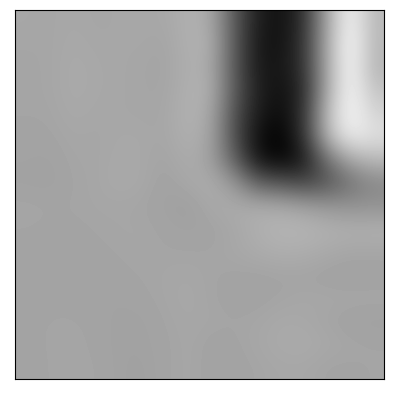

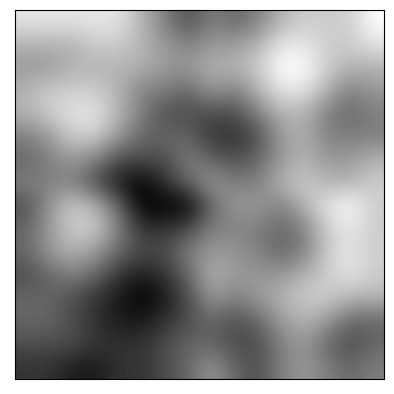

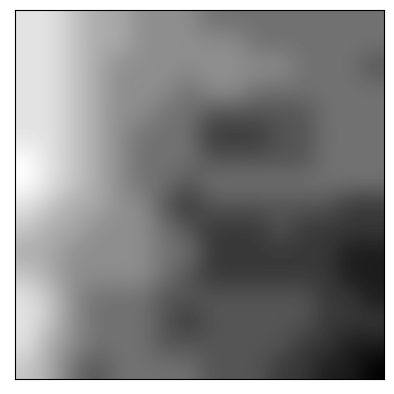

In [42]:
img = read_img('hw2_files/grace_hopper.png')
patches = image_patches(img)

display_img(patches[260])
display_img(patches[528])
display_img(patches[0])

(3 pts) Early work in computer vision used unique images patches as descriptors or features of images
for applications ranging from image alignment and stitching to object classification and detection.
Inspect the patches extracted in the previous question, and discuss, in a few sentences, why they
would be good or bad descriptors. Consider how those patches would look like if we changed the
object’s pose, scale, illumination, etc.

Gaussian Filter [16 pts] \
A Gaussian filter is a filter whose impulse response is a Gaussian function. Here
we only talk about the discrete kernel and assume 2D Gaussian distribution is circularly symmetric.

$$1D\ Kernel\ :\ G(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}} \quad \quad 2D\ Kernel\ :\ G(x,y) = \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}}$$


(5 pts) For a 2D Gaussian filter with a given variance σ2, the convolution can be reduced by sequential
operations of a 1D kernel. Prove that a convolution by a 2D Gaussian filter is equivalent to sequential
convolutions of a vertical and a horizontal 1D Gaussian filter. Specify the relationship between the
2D and 1D Gaussian filter, especially the relationship between their variances.

(4 pts) Take the image ’grace hopper.png’ as the input. Complete the function convolve()
and other related parts in filters.py. Use a Gaussian kernel with size 3 ×3 and $$\sigma^{2} \approx \frac{1}{2ln(2)}$$
Plot the output images in your report. Describe what Gaussian filtering does to the image in one sentence.
Be sure to implement convolution and not cross-correlation.